<a href="https://colab.research.google.com/github/ClauderCarvalho/AnaliseFinanceira-Python/blob/master/Simula%C3%A7%C3%A3o_Carteira_de_A%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simular uma carteira de ações

In [0]:
!pip install yfinance --upgrade --no-cache-dir

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web

import yfinance as yf
yf.pdr_override()

import seaborn as sns

tratar os dados

In [24]:
#Vou buscar 5 ações para analise
tickers = ['ABEV3.SA',' ITSA4.SA', 'WEGE3.SA','USIMS.SA','VALE3.SA']

carteira = web.get_data_yahoo(tickers, period='5y')['Adj Close']

ibov = web.get_data_yahoo('^BVSP', period='5y')['Adj Close']

[*********************100%***********************]  5 of 5 completed

2 Failed downloads:
- USIMS.SA: No data found, symbol may be delisted
-  ITSA4.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


In [25]:
carteira.head()

,ITSA4.SA,ABEV3.SA,USIMS.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2015-05-22 00:00:00,NaN,16.250122,NaN,17.700476,11.966708
2015-05-25 00:00:00,NaN,16.380121,NaN,17.971310,12.271100
2015-05-26 00:00:00,NaN,16.059448,NaN,18.163517,11.842166
2015-05-27 00:00:00,NaN,16.033451,NaN,18.303305,12.028938
2015-05-28 00:00:00,NaN,16.016119,NaN,17.945101,11.897559


In [26]:
carteira.tail()

,ITSA4.SA,ABEV3.SA,USIMS.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2020-05-18 00:00:00,NaN,12.10,NaN,51.259998,36.619999
2020-05-19 00:00:00,NaN,11.94,NaN,52.299999,36.919998
2020-05-20 00:00:00,NaN,12.14,NaN,52.500000,37.639999
2020-05-21 00:00:00,NaN,11.88,NaN,50.919998,37.439999
2020-05-22 00:00:00,NaN,11.74,NaN,50.270000,37.240002


In [27]:
ibov.head()

Date
2015-05-22    54377.0
2015-05-25    54609.0
2015-05-26    53630.0
2015-05-27    54236.0
2015-05-28    53976.0
Name: Adj Close, dtype: float64

In [28]:
ibov.tail()

Date
2020-05-18    81194.0
2020-05-19    80742.0
2020-05-20    81319.0
2020-05-21    83027.0
2020-05-22    82173.0
Name: Adj Close, dtype: float64

ANALISE

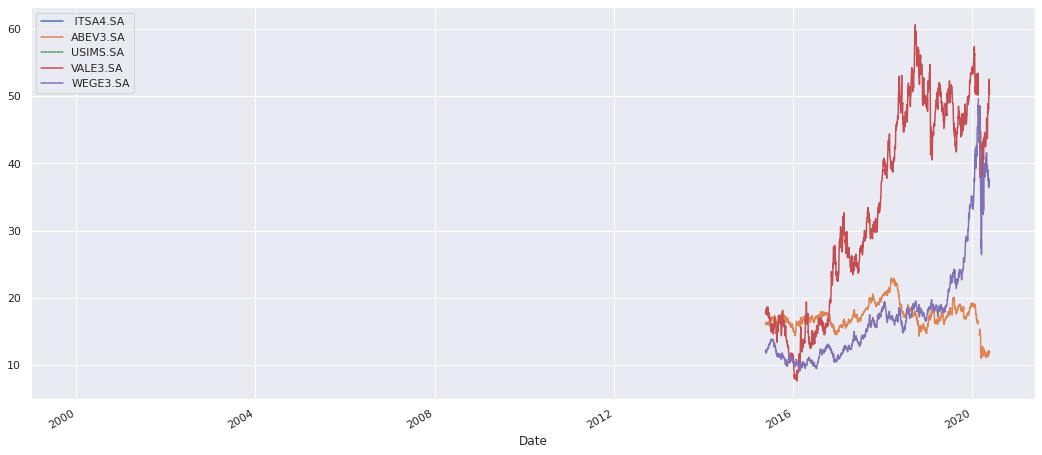

In [29]:
sns.set()
carteira.plot(figsize=(18,8))

In [32]:
#Criar uma nova coluna [carteira_normalizada]

carteira_normalizada = (carteira / carteira.iloc[0])*10000

carteira_normalizada.head()

,ITSA4.SA,ABEV3.SA,USIMS.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2015-05-22 00:00:00,NaN,10000.000000,NaN,10000.000000,10000.000000
2015-05-25 00:00:00,NaN,10079.998883,NaN,10153.009430,10254.365575
2015-05-26 00:00:00,NaN,9882.663141,NaN,10261.598227,9895.926069
2015-05-27 00:00:00,NaN,9866.665008,NaN,10340.572191,10052.002697
2015-05-28 00:00:00,NaN,9855.999194,NaN,10138.202552,9942.215506


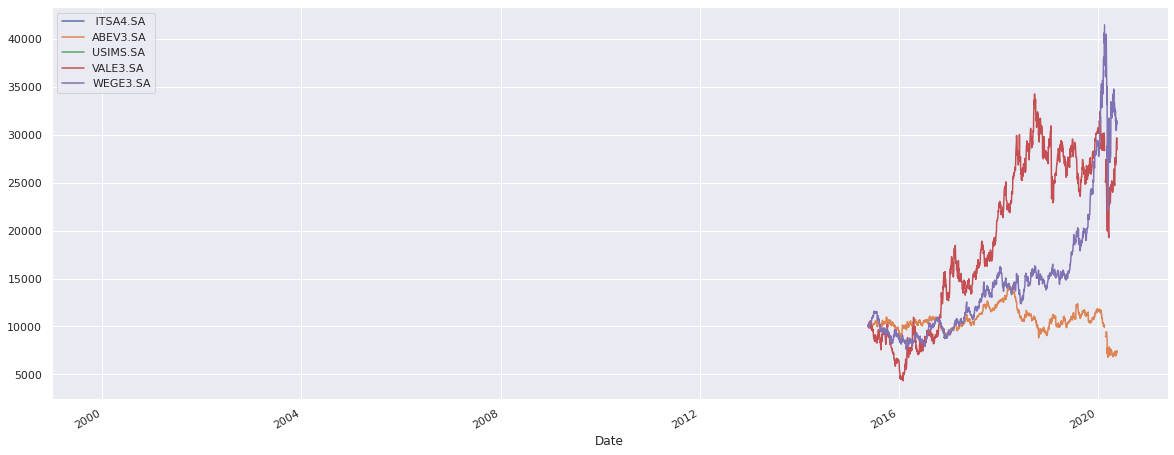

In [35]:
carteira_normalizada.plot(figsize=(20,8))

plt.show()

In [0]:
#Criar uma nova coluna 

#Colocar o axis =1 para somar as linhas

carteira_normalizada['saldo'] = carteira_normalizada.sum(axis=1)

In [38]:
carteira_normalizada

,ITSA4.SA,ABEV3.SA,USIMS.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2015-05-22,NaN,10000.000000,NaN,10000.000000,10000.000000,60000.000000
2015-05-25,NaN,10079.998883,NaN,10153.009430,10254.365575,60974.747775
2015-05-26,NaN,9882.663141,NaN,10261.598227,9895.926069,60080.374874
2015-05-27,NaN,9866.665008,NaN,10340.572191,10052.002697,60518.479793
2015-05-28,NaN,9855.999194,NaN,10138.202552,9942.215506,59872.834506
...,...,...,...,...,...,...
2020-05-18,NaN,7446.098146,NaN,28959.672729,30601.564249,134014.670248
2020-05-19,NaN,7347.636854,NaN,29547.228077,30852.259120,135494.248103
2020-05-20,NaN,7470.713322,NaN,29660.219822,31453.929362,137169.725012


In [0]:
# NOrmalizar o iBOV para comparar

ibov_norma = (ibov / ibov.iloc[0])*50000

In [41]:
ibov_norma.head()

Date
2015-05-22    50000.000000
2015-05-25    50213.325487
2015-05-26    49313.128713
2015-05-27    49870.349596
2015-05-28    49631.277930
Name: Adj Close, dtype: float64

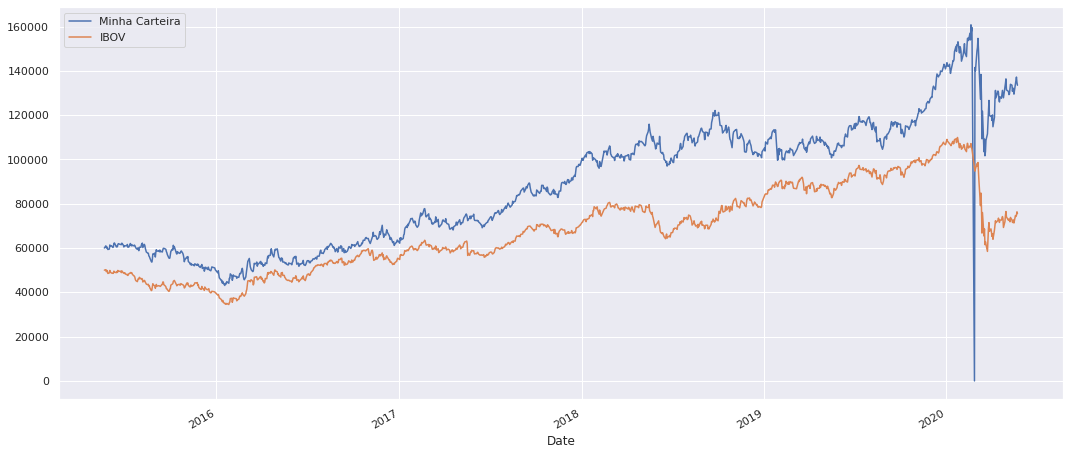

In [46]:

# Grafico da carteira simulada.
carteira_normalizada['saldo'].plot(figsize=(18,8), label='Minha Carteira')

ibov_norma.plot(label='IBOV')

plt.legend()

plt.show()